In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
Base.classes.keys()

[&#39;measurement&#39;, &#39;station&#39;]

In [7]:
# Save references to each table - Measurement
Measurement = Base.classes.measurement

In [8]:
# Save references to each table - Station
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{&#39;_sa_instance_state&#39;: &lt;sqlalchemy.orm.state.InstanceState at 0x20bf10943c8&gt;,
 &#39;station&#39;: &#39;USC00519397&#39;,
 &#39;prcp&#39;: 0.08,
 &#39;date&#39;: &#39;2010-01-01&#39;,
 &#39;tobs&#39;: 65.0,
 &#39;id&#39;: 1}

In [11]:
for row in session.query(Measurement, Measurement.date).limit(5).all():
    print(row)

(&lt;sqlalchemy.ext.automap.measurement object at 0x0000020BF454DF48&gt;, &#39;2010-01-01&#39;)
(&lt;sqlalchemy.ext.automap.measurement object at 0x0000020BF45C4908&gt;, &#39;2010-01-02&#39;)
(&lt;sqlalchemy.ext.automap.measurement object at 0x0000020BF45C4A48&gt;, &#39;2010-01-03&#39;)
(&lt;sqlalchemy.ext.automap.measurement object at 0x0000020BF45C4AC8&gt;, &#39;2010-01-04&#39;)
(&lt;sqlalchemy.ext.automap.measurement object at 0x0000020BF45C4B48&gt;, &#39;2010-01-06&#39;)


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [13]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()



(&#39;2017-08-23&#39;)

In [14]:
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [15]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, 
       Measurement.prcp]
year_prcp = session.query(*sel).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
year_prcp

-11&#39;, 0.3),
 (&#39;2016-09-11&#39;, 0.6),
 (&#39;2016-09-12&#39;, 0.0),
 (&#39;2016-09-12&#39;, 0.04),
 (&#39;2016-09-12&#39;, None),
 (&#39;2016-09-12&#39;, None),
 (&#39;2016-09-12&#39;, 0.15),
 (&#39;2016-09-12&#39;, 0.31),
 (&#39;2016-09-12&#39;, 1.04),
 (&#39;2016-09-13&#39;, 0.02),
 (&#39;2016-09-13&#39;, 0.37),
 (&#39;2016-09-13&#39;, 0.32),
 (&#39;2016-09-13&#39;, None),
 (&#39;2016-09-13&#39;, 0.46),
 (&#39;2016-09-13&#39;, 0.34),
 (&#39;2016-09-13&#39;, 1.2),
 (&#39;2016-09-14&#39;, 1.32),
 (&#39;2016-09-14&#39;, 0.9),
 (&#39;2016-09-14&#39;, 1.84),
 (&#39;2016-09-14&#39;, None),
 (&#39;2016-09-14&#39;, 1.19),
 (&#39;2016-09-14&#39;, 2.33),
 (&#39;2016-09-14&#39;, 6.7),
 (&#39;2016-09-15&#39;, 0.42),
 (&#39;2016-09-15&#39;, 0.12),
 (&#39;2016-09-15&#39;, 0.07),
 (&#39;2016-09-15&#39;, None),
 (&#39;2016-09-15&#39;, 0.17),
 (&#39;2016-09-15&#39;, 0.83),
 (&#39;2016-09-15&#39;, 3.35),
 (&#39;2016-09-16&#39;, 0.06),
 (&#39;2016-09-16&#39;, 0.01),
 (&#39;2016-09-16&#39;, 0.07

In [34]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date
sel = [Measurement.date,
        Measurement.prcp]
graph_prcp = session.query(*sel).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
df = pd.DataFrame(graph_prcp, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df = df.dropna()
df = df.sort_values(by='date', ascending=True)
df


,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08


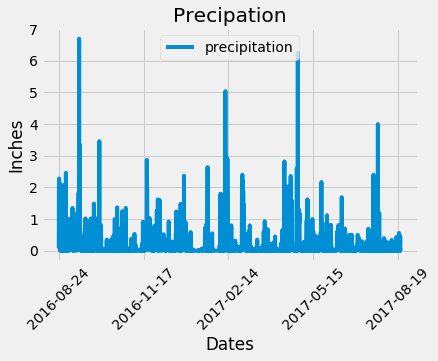

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation over 12 months")
plt.legend(loc='upper center')
plt.xlabel('Dates')
plt.xticks(rotation = 45)
plt.title("Precipation")
plt.ylabel("Inches")
plt.savefig("image/Precipation.png")
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sel = [Measurement.station,
        Measurement.date, 
       Measurement.prcp]
sel_prcp = session.query(*sel)
prcp_df = pd.DataFrame(sel_prcp)
grouped_prcp = prcp_df.groupby('station').agg({'prcp':['count', 'mean', 'median', 'var', 'std', 'sem']})   
grouped_prcp
#prcp_df

prcp                                               
            count      mean median       var       std       sem
station                                                         
USC00511918  1932  0.047971   0.00  0.059940  0.244826  0.005570
USC00513117  2696  0.141921   0.02  0.188274  0.433905  0.008357
USC00514830  1937  0.121058   0.02  0.171240  0.413812  0.009402
USC00516128  2484  0.429988   0.16  0.508367  0.712999  0.014306
USC00517948   683  0.063602   0.00  0.059502  0.243931  0.009334
USC00518838   342  0.207222   0.03  0.258374  0.508305  0.027486
USC00519281  2772  0.212352   0.04  0.295187  0.543312  0.010319
USC00519397  2685  0.049020   0.00  0.044345  0.210583  0.004064
USC00519523  2572  0.114961   0.00  0.168295  0.410237  0.008089

In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Measurement.station.distinct())).all()

[(9)]

In [19]:
test = session.query(Measurement.station.distinct()).all()
test

[(&#39;USC00519397&#39;),
 (&#39;USC00513117&#39;),
 (&#39;USC00514830&#39;),
 (&#39;USC00517948&#39;),
 (&#39;USC00518838&#39;),
 (&#39;USC00519523&#39;),
 (&#39;USC00519281&#39;),
 (&#39;USC00511918&#39;),
 (&#39;USC00516128&#39;)]

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
count = func.count(Measurement.station)
stations = session.query(Measurement.station, count).\
    group_by(Measurement.station).\
        order_by(count.desc()).all()
stations

[(&#39;USC00519281&#39;, 2772),
 (&#39;USC00519397&#39;, 2724),
 (&#39;USC00513117&#39;, 2709),
 (&#39;USC00519523&#39;, 2669),
 (&#39;USC00516128&#39;, 2612),
 (&#39;USC00514830&#39;, 2202),
 (&#39;USC00511918&#39;, 1979),
 (&#39;USC00517948&#39;, 1372),
 (&#39;USC00518838&#39;, 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
station_temps = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
station_temps

[(&#39;USC00519281&#39;, 54.0, 85.0, 71.66378066378067)]

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.station,
       Measurement.tobs]
sel_tobs = session.query(*sel)
tobs_df = pd.DataFrame(sel_tobs)
grouped_tobs = tobs_df.groupby('station').agg({'tobs':['count', 'mean', 'median', 'var', 'std', 'sem']})   
grouped_tobs

tobs                                                 
            count       mean median        var       std       sem
station                                                           
USC00511918  1979  71.615968   72.0  29.989957  5.476309  0.123102
USC00513117  2709  72.689184   73.0  13.138218  3.624668  0.069641
USC00514830  2202  74.873297   75.0  14.534144  3.812367  0.081243
USC00516128  2612  70.915008   71.0  12.417898  3.523904  0.068951
USC00517948  1372  74.684402   75.0  19.211048  4.383041  0.118331
USC00518838   511  72.724070   73.0  17.180576  4.144946  0.183362
USC00519281  2772  71.663781   72.0  18.989045  4.357642  0.082767
USC00519397  2724  74.553231   76.0  21.433449  4.629627  0.088704
USC00519523  2669  74.543649   75.0  18.689717  4.323161  0.083681

In [23]:
sel = [Measurement.date,
        Measurement.station,
       Measurement.tobs]
year_tobs = session.query(*sel).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
year_tobs

[(&#39;2016-08-24&#39;, &#39;USC00519281&#39;, 77.0),
 (&#39;2016-08-25&#39;, &#39;USC00519281&#39;, 80.0),
 (&#39;2016-08-26&#39;, &#39;USC00519281&#39;, 80.0),
 (&#39;2016-08-27&#39;, &#39;USC00519281&#39;, 75.0),
 (&#39;2016-08-28&#39;, &#39;USC00519281&#39;, 73.0),
 (&#39;2016-08-29&#39;, &#39;USC00519281&#39;, 78.0),
 (&#39;2016-08-30&#39;, &#39;USC00519281&#39;, 77.0),
 (&#39;2016-08-31&#39;, &#39;USC00519281&#39;, 78.0),
 (&#39;2016-09-01&#39;, &#39;USC00519281&#39;, 80.0),
 (&#39;2016-09-02&#39;, &#39;USC00519281&#39;, 80.0),
 (&#39;2016-09-03&#39;, &#39;USC00519281&#39;, 78.0),
 (&#39;2016-09-04&#39;, &#39;USC00519281&#39;, 78.0),
 (&#39;2016-09-05&#39;, &#39;USC00519281&#39;, 78.0),
 (&#39;2016-09-06&#39;, &#39;USC00519281&#39;, 73.0),
 (&#39;2016-09-07&#39;, &#39;USC00519281&#39;, 74.0),
 (&#39;2016-09-08&#39;, &#39;USC00519281&#39;, 80.0),
 (&#39;2016-09-09&#39;, &#39;USC00519281&#39;, 79.0),
 (&#39;2016-09-10&#39;, &#39;USC00519281&#39;, 77.0),
 (&#39;2016-09-11&#39;, &#39

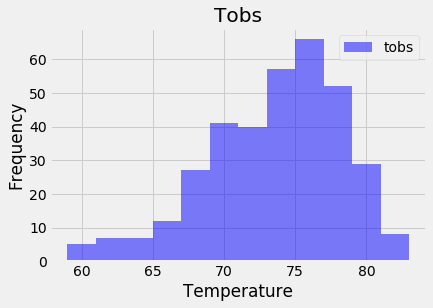

In [24]:
df_tobs = pd.DataFrame(year_tobs)
df_tobs.set_index('date', inplace=True)
kwargs = dict(alpha=0.5, bins=12)
df_tobs.plot.hist('date', **kwargs, color='b', label='tobs')
plt.title("Tobs")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.savefig("image/Temperature.png")
plt.show()

## Bonus Challenge Assignment

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [32]:
# Plot the daily normals as an area plot with `stacked=False`
